In [1]:
from yahpo_gym.configuration import config_dict, cfg
from yahpo_gym.benchmark_set import BenchmarkSet
from yahpo_gym import local_config
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
bench = BenchmarkSet("lcbench", check=False)
bench.config.config['model'] = "new_model_noisy.onnx"

In [3]:
df = pd.read_csv(bench.config.get_path("test_dataset"))

In [4]:
def plot_true_lc(ccc):
    # Subset data to obtain learning curve for config
    config = pd.DataFrame(data = ccc, index = [0])
    config.drop(bench.config.fidelity_params, axis = 1, inplace=True)
    pdf = df.merge(config, on=list(config.columns.values))
    pdf = pdf.sort_values(bench.config.fidelity_params[0])
    plt.plot(pdf[bench.config.fidelity_params[0]], pdf[bench.config.y_names[1]], marker = "o")

In [5]:
def plot_lc_lcbench(ccc):
    ccc["OpenML_task_id"] = str(ccc["OpenML_task_id"])
    out = []
    for i in range(51):
        val = ccc.copy()
        val.update({"epoch" : i+1})
        out += [val]

    colors = ['red', 'blue', 'orange', 'purple', 'green', 'gold', 'magenta', 'darkviolet', 'cyan', 'olive']
    for i in range(10):
        res = bench.objective_function(out, seed=i)
        res = [x['val_accuracy'] for x in res]
        plt.plot(range(51), res, color=colors[i])

{'OpenML_task_id': 7593, 'batch_size': 231.0, 'epoch': 46.0, 'learning_rate': 0.011135213, 'max_dropout': 0.067842335, 'max_units': 158.0, 'momentum': 0.40883026, 'num_layers': 3.0, 'weight_decay': 0.06467402}


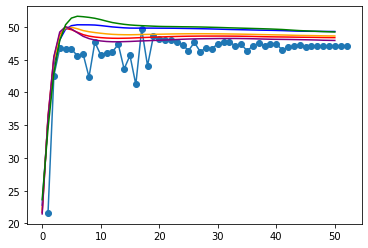

In [6]:
# Draw a sample configuration
ccs = df.sample(1).to_dict()
ccc = {k:list(ccs[k].values())[0] for k in bench.config_space.get_hyperparameter_names()}
print(ccc)
plot_true_lc(ccc)
plot_lc_lcbench(ccc)